<a href="https://colab.research.google.com/github/AceRb6/Procesamiento_de_Lenguaje_Natural/blob/main/PL3_PLN_CanoPortugalIsraelDanielArturo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2: Vectorizacion de textos

**Cargar el Dataset**

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

# Cargar el dataset DBpedia
dbpedia = load_dataset('dbpedia_14', split='train')

# Mostrar información básica
print(f"Total de documentos: {len(dbpedia)}")
print(f"Ejemplo de texto: {dbpedia[0]['content'][:100]}...")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/106M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/13.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/70000 [00:00<?, ? examples/s]

Total de documentos: 560000
Ejemplo de texto:  Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey t...


In [ ]:
import pandas as pd

data=pd.DataFrame(dbpedia)

display(data.head())

,label,title,content
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...


In [ ]:
print(f"Total de documentos en la categoría '{len(data.content)}")

#Exploración de la longitud de los textos
longitudes = [len(texto.split()) for texto in data.content]
print(f"\nLongitud de los textos:")
print(f"Máximo: {max(longitudes)} palabras")
print(f"Mínimo: {min(longitudes)} palabras")
print(f"Promedio: {sum(longitudes) / len(longitudes)} palabras")

Total de documentos en la categoría '560000

Longitud de los textos:
Máximo: 1484 palabras
Mínimo: 1 palabras
Promedio: 46.13323392857143 palabras


In [ ]:
#Filtrar documentos con al menos 100 palabras
documentos_filtrados = data[data['content'].apply(lambda x: len(x.split()) >= 100)]
#Mostrar la cantidad de documentos filtrados
print(f"\nTotal de documentos filtrados con al menos 100 palabras: {len(documentos_filtrados)}")


Total de documentos filtrados con al menos 100 palabras: 943


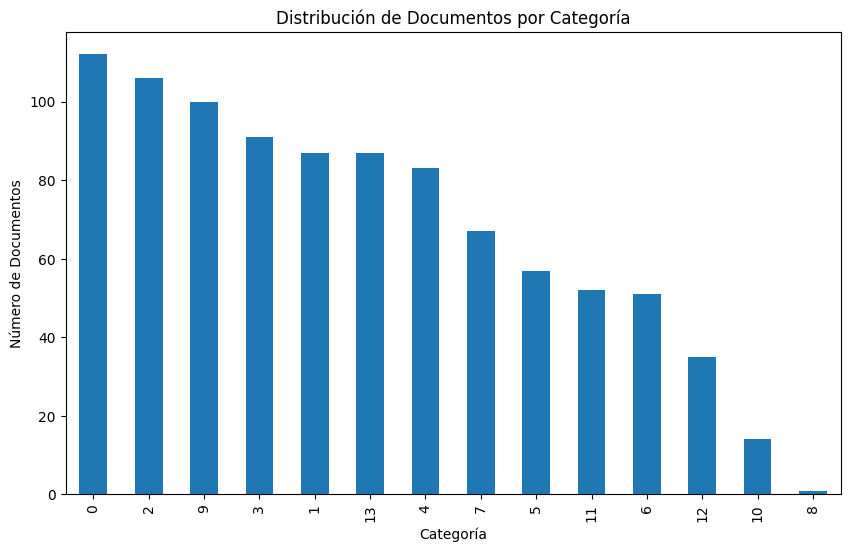

In [ ]:
import matplotlib.pyplot as plt

# Contar documentos por categoría
documentos_filtrados['label'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("Distribución de Documentos por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Número de Documentos")
plt.show()

In [ ]:
import random

# Revisión de documentos aleatorios (20 documentos) de los filtrados
indices_aleatorios_filtrados = random.sample(range(len(documentos_filtrados)), min(20, len(documentos_filtrados)))
print("\nRevisión de documentos aleatorios filtrados:")

for indice in indices_aleatorios_filtrados:
    # Obtener el documento y su etiqueta correspondiente
    documento = documentos_filtrados.iloc[indice]['content']
    etiqueta = documentos_filtrados.iloc[indice]['label']

    # Mostrar el contenido del documento y su etiqueta
    print(f"\nDocumento {indice + 1} (Etiqueta: {etiqueta}):")
    print(documento[:200])  # Mostrar los primeros 500 caracteres del documento


Revisión de documentos aleatorios filtrados:

Documento 97 (Etiqueta: 0):
 The Yari Film Group (YFG) is an independent film company founded in 2002 and headed by producer Bob Yari which deals in financing production acquisition sales and distribution of theatrical feature f

Documento 669 (Etiqueta: 9):
 Eurydera is a genus of beetles in the family Carabidae containing the following species: Eurydera acutispina (Fairmaire 1868) Eurydera alluaudi Jeannel 1949 Eurydera ambreana Mateu 1973 Eurydera arma

Documento 185 (Etiqueta: 1):
 The University of Valencia Science Park (Valencian: Parc Científic de la Universitat de València also known by the acronym PCUV) is an initiative to strengthen ties between the scientific potential o

Documento 853 (Etiqueta: 12):
 Oasis of the Zombies (originally called L'Abîme des Morts-Vivants / The Abyss of the Living Dead) is a 1982 film by director Jesús Franco for French producer Marius Lesoeur.The plot involves treasure

Documento 168 (Etiqueta: 1):


In [ ]:
display(documentos_filtrados.head())

,label,title,content
796,0,NASCAR Mexico,NASCAR Mexico is a joint-venture between NASC...
1743,0,Meadow Fresh,Meadow Fresh NZ Ltd formed as the result of a...
2130,0,Alberta Theatre Projects,Alberta Theatre Projects (ATP) is a Canadian ...
2468,0,ICE - International Currency Exchange,ICE - International Currency Exchange - often...
2696,0,GAM Holding,GAM Holding AG (SIX: GAM) is an independent p...


**Investiga y describe otras fuentes de datos publicas que podrían usarse para abordar las tecnicas vistas en clase.**

Hay algunos dataset en kaggle que sirven para este tipo de practicas como de noticias, pero en lo personal ocupe para esta practica uno de hugging face sobre wikidb que clasifica varias fuentes de informacion en n etiquetas, pero al ver la exploracion de los dataset podemos ver que si hay una cantidad decente de fuentes filtrando las cantidades pero aun así son muy grandes las matrices, de hugging face hay variedad pero igual hay otros como el dataset de Reuters de NLTK que esta categorizado en varios topicos, de Gensim de la wiki pero no pude probarlo,

**Normalización**

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

processed_docs = documentos_filtrados['content'].apply(preprocess_text)

In [ ]:
# Función para remover acentos
def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# Función completa de preprocesamiento
def preprocess_pipeline(text):
    # 1. Lowercase y acentos
    text = text.lower()
    text = remove_accents(text)

    # 2. Remover caracteres especiales y números
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Normalizar espacios
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar preprocesamiento
processed_docs = processed_docs.apply(preprocess_pipeline)

In [ ]:
display(processed_docs.head())

,content
796,nascar mexico is a jointventure between nascar...
1743,meadow fresh nz ltd formed as the result of a ...
2130,alberta theatre projects atp is a canadian the...
2468,ice international currency exchange often know...
2696,gam holding ag six gam is an independent pure ...


**Tokenización**

In [ ]:
# Tokenizar los textos procesados
tokens = processed_docs.apply(lambda x: x.split())

#Mostrar los primeros 100 tokens de los primeros 2 documentos sin stopwords
print(f"Tokens del primer documento filtrado sin stopwords:\n{tokens_filtrados[0]}")
print(f"\nTokens del segundo documento filtrado sin stopwords:\n{tokens_filtrados[1]}")

Tokens del primer documento filtrado sin stopwords:
['nascar', 'mexico', 'is', 'a', 'jointventure', 'between', 'nascar', 'and', 'ocesa', 'a', 'mexican', 'entertainment', 'company', 'aiming', 'to', 'develop', 'manage', 'and', 'operate', 'local', 'motorsports', 'events', 'and', 'oversee', 'television', 'distribution', 'sponsorship', 'and', 'licensingthe', 'venture', 'attempts', 'to', 'create', 'marketing', 'programs', 'to', 'increase', 'interest', 'in', 'local', 'nascar', 'events', 'as', 'well', 'as', 'nascar', 'events', 'in', 'the', 'united', 'states', 'that', 'are', 'televised', 'in', 'mexiconascar', 'mexico', 'has', 'been', 'responsible', 'for', 'the', 'organization', 'of', 'the', 'corona', 'mxico', 'a', 'nascar', 'nationwide', 'series', 'race', 'at', 'the', 'autodromo', 'hermanos', 'rodriguez', 'in', 'mexico', 'cityit', 'also', 'organizes', 'and', 'sanctions', 'two', 'racing', 'series', 'the', 'nascar', 'mexico', 'corona', 'series', 'and', 'the', 'nascar', 'mexico', 't', 'seriesthe',

**Stopwords y lematización**

In [ ]:
#Libreria para limpiar stopwords
!pip install nltk

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Función para limpiar y lematizar tokens
def clean_and_lemmatize(tokens):
    # Eliminar stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lematizar
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Aplicar limpieza y lematización
tokens = tokens.apply(clean_and_lemmatize)

In [ ]:
print(tokens)

796       [nascar, mexico, jointventure, nascar, ocesa, ...
1743      [meadow, fresh, nz, ltd, formed, result, brand...
2130      [alberta, theatre, project, atp, canadian, the...
2468      [ice, international, currency, exchange, often...
2696      [gam, holding, ag, six, gam, independent, pure...
                                ...                        
558089    [painkiller, chinese, pinyin, zhngxng, ynyu, l...
558120    [amsterdam, weekly, free, englishlanguage, cul...
558354    [terrible, vengeance, russian, gothic, horror,...
558777    [monterey, county, weekly, formerly, coast, we...
559877    [bury, free, land, poem, france, harper, afric...
Name: content, Length: 943, dtype: object


**¿Que criterios seguiste para la selección de las tecnicas de normalizacion en tu codigo?**

Para la selección de las técnicas de normalización, se consideraron las características del dataset y los objetivos del análisis. En este caso, el dataset contiene textos relacionados con diversas categorías temáticas, como economía, tecnología y ciencia, lo que implica un lenguaje predominantemente formal pero con variaciones en el uso de términos técnicos y generales. Por ello, se aplicaron las siguientes técnicas: eliminacion de caracteres especiales y numeros. conversion de minusculas, eliminacion de stopwords y lematizacion, con el fin de reducir ruido y mejorar la interpretacion del texto al momento de calcular la matriz.

**¿En todos los casos deberiamos eleminar stopwords?¿por que?**

No, no siempre es necesario eliminar stopwords, ya que depende del contexto y los objetivos del análisis. En esta práctica, se eliminaron stopwords porque TF-IDF penaliza términos que aparecen en muchos documentos (como las stopwords), reduciendo su peso en la matriz.

Por lo tanto, la decisión de eliminar stopwords debe basarse en el tipo de análisis y el propósito del modelo. En el caso de TF-IDF , eliminar stopwords es generalmente recomendable para enfatizar términos más distintivos.

**¿En que casos podría causar problemas eliminar stopwords?¿por que?**

Eliminar stopwords podría causar problemas en los siguientes casos:

Pérdida de contexto: Al remover stopwords, se puede alterar el significado original del texto. Por ejemplo, en la frase "I do not support this idea", eliminar "not" cambiaría completamente el sentido del mensaje.

Tareas de análisis de sentimientos: Las stopwords como "no", "not", "never" son cruciales para determinar polaridad (positiva o negativa) en el texto.

Dominios específicos: En algunos contextos, ciertas stopwords pueden ser parte integral del vocabulario técnico o especializado. Por ejemplo, en textos legales o médicos, palabras como "and", "or", o "if" pueden ser fundamentales para interpretar cláusulas o condiciones.

Textos muy cortos: En documentos breves, como tweets o reseñas, las stopwords pueden constituir una proporción significativa del texto. Eliminarlas podría resultar en la pérdida de información crítica.

aunque eliminar stopwords es útil para reducir el ruido en muchos casos, es importante evaluar si estas palabras aportan valor en el contexto específico del análisis antes de decidir su eliminación. En el caso de TF-IDF , eliminar stopwords es generalmente beneficioso, pero debe hacerse con cuidado para evitar perder información relevante

**Construir y explorar la matriz TF-IDF**

In [ ]:
from collections import defaultdict

def c_tf(doc):
    tf_dict = defaultdict(int)
    total_terms = len(doc)

    # Contar la frecuencia de cada término
    for term in doc:
        tf_dict[term] += 1

    # Normalizar dividiendo entre el total de términos
    for term in tf_dict:
        tf_dict[term] /= total_terms

    return tf_dict

In [ ]:
import math

def c_idf(docs):
    idf_dict = defaultdict(float)
    num_docs = len(docs)

    # Contar en cuántos documentos aparece cada término
    term_doc_count = defaultdict(int)
    for doc in docs:
        unique_terms = set(doc)  # Evitar contar múltiples ocurrencias en el mismo documento
        for term in unique_terms:
            term_doc_count[term] += 1

    # Calcular IDF para cada término
    for term, count in term_doc_count.items():
        idf_dict[term] = math.log(num_docs / count)

    return idf_dict

In [ ]:
def tfidf_m(docs):
    # Paso 1: Calcular IDF para todos los términos
    idf_dict = c_idf(docs)

    # Paso 2: Construir la matriz TF-IDF
    vocab = sorted(idf_dict.keys())  # Ordenar el vocabulario
    tfidf_matrix = []

    for doc in docs:
        tf_dict = c_tf(doc)  # Calcular TF para el documento actual
        tfidf_vector = []

        for term in vocab:
            tf = tf_dict.get(term, 0)  # Obtener TF del término (0 si no está en el documento)
            idf = idf_dict[term]      # Obtener IDF del término
            tfidf_vector.append(tf * idf)  # Multiplicar TF por IDF

        tfidf_matrix.append(tfidf_vector)

    return vocab, tfidf_matrix

In [ ]:
# Construir la matriz TF-IDF
vocab, tfidf_matrix = tfidf_m(tokens)

# Crear un DataFrame para la matriz TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix, columns=vocab)

In [ ]:
# Mostrar la matriz TF-IDF como un DataFrame
print("\nMatriz TF-IDF (Primeras 10 palabras y 5 documentos):")
print(df_tfidf.iloc[:40, :20])  # Mostrar los primeros 5 documentos y 10 palabras


Matriz TF-IDF (Primeras 10 palabras y 5 documentos):
     aa  aaa  aac  aacsb  aaid  aakrosh  aaron   ab  abacha  abachabako  \
0   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
1   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
2   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
3   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
4   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
5   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
6   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
7   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
8   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
9   0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
10  0.0  0.0  0.0    0.0   0.0      0.0    0.0  0.0     0.0         0.0   
11  0.0  0.0  0.0    0.0   0.0      0.0    0.0

In [ ]:
print("\nMatriz TF-IDF (solo documentos con palabras relevantes):")
for i, vector in enumerate(tfidf_matrix[:50]):  # Iterar sobre cada documento
    if any(valor > 0 for valor in vector):  # Verificar si hay al menos un valor mayor a cero
        print(f"\nDocumento {i + 1}:")
        for j, valor in enumerate(vector):  # Iterar sobre cada palabra en el vocabulario
            if valor > 0:  # Solo mostrar palabras con peso mayor a cero
                print(f"  {vocab[j]:<10} {valor:.3f}")


Matriz TF-IDF (solo documentos con palabras relevantes):

Documento 1:
  accident   0.077
  aiming     0.091
  also       0.020
  attempt    0.065
  autodromo  0.091
  carlos     0.073
  cityit     0.082
  company    0.031
  corona     0.183
  create     0.062
  develop    0.073
  distribution 0.056
  entertainment 0.056
  event      0.142
  experienced 0.073
  fatality   0.091
  final      0.048
  first      0.020
  hermanos   0.091
  increase   0.062
  interest   0.053
  jointventure 0.091
  june       0.040
  killed     0.073
  lap        0.077
  licensingthe 0.091
  local      0.088
  manage     0.077
  marketing  0.061
  mexican    0.061
  mexico     0.257
  mexiconascar 0.091
  motorsports 0.091
  mxico      0.082
  nascar     0.639
  nationwide 0.082
  ocesa      0.091
  operate    0.082
  organization 0.053
  organizes  0.091
  oversee    0.091
  pardo      0.091
  program    0.045
  race       0.056
  racing     0.070
  responsible 0.059
  rodriguez  0.073
  sanction   0.091


**Preguntas:**

**¿Por qué el IDF usa logaritmo en su cálculo?**

El uso del logaritmo en el cálculo del IDF tiene como objetivo suavizar la penalización que se aplica a las palabras que aparecen en muchos documentos. Sin el logaritmo, las palabras extremadamente comunes podrían dominar negativamente los valores de TF-IDF, reduciendo demasiado su peso y distorsionando la representación final de los textos. Al aplicar el logaritmo, se modera este efecto, permitiendo un equilibrio más adecuado entre las palabras comunes y las raras, lo cual ayuda a resaltar términos que son significativos dentro del contexto del análisis.

**¿Qué palabras tienen valores altos?**

Las palabras que tienen valores altos en la matriz TF-IDF son términos específicos que aparecen con cierta frecuencia en un documento particular pero que son poco comunes en el conjunto general de documentos analizados. Por ejemplo, en los resultados obtenidos, palabras como "nascar" (0.639), "wall" (0.328) y "mexico" (0.257) muestran valores altos en algunos documentos, lo que sugiere que estos términos son relevantes para caracterizar el contenido de esos textos. Estas palabras suelen estar relacionadas con temas centrales o conceptos clave dentro del documento, permitiendo diferenciarlo de otros textos en el corpus 1.

**¿Las palabras más comunes tienen valores altos o bajos? ¿Por qué?**

Las palabras más comunes, como las stopwords ("the", "and", "is"), generalmente tienen valores bajos en el cálculo de TF-IDF debido a que aparecen en casi todos los documentos del corpus. Esto ocurre porque el IDF asigna un peso inversamente proporcional a la frecuencia de aparición de una palabra en los documentos: mientras más documentos contengan la palabra, menor será su IDF. Como resultado, estas palabras terminan siendo penalizadas y su contribución al modelo es mínima, lo cual es deseable ya que no suelen aportar información relevante para distinguir entre documentos.


**¿Qué significa que una palabra tenga TF-IDF cercano a 0 en un documento?**

Cuando una palabra tiene un valor de TF-IDF cercano a 0 en un documento, esto significa que dicha palabra o bien no aparece en ese documento, o si aparece, es tan común en el conjunto de documentos que su importancia relativa es insignificante. En otras palabras, su presencia no contribuye significativamente a la representación del contenido del documento ni permite diferenciarlo de otros textos dentro del corpus. Este comportamiento es esperado para términos que son irrelevantes desde el punto de vista temático o que carecen de especificidad en el contexto analizado.

**Selección de caracteristicas: Probabilidad Marginal, Chi Cuadrado, Informacion Mutua**

In [ ]:
def calcular_probabilidad_marginal(matriz_tfidf, vocabulario):
    total_pesos = sum(sum(vector) for vector in matriz_tfidf)  # Suma total de pesos en la matriz
    probabilidades = {}

    for idx, palabra in enumerate(vocabulario):
        peso_palabra = sum(matriz_tfidf[doc_idx][idx] for doc_idx in range(len(matriz_tfidf)))
        probabilidades[palabra] = peso_palabra / total_pesos if total_pesos > 0 else 0

    return probabilidades

# Calcular probabilidades marginales
probabilidades_marginales = calcular_probabilidad_marginal(tfidf_matrix, vocab)
print("Palabras con mayor probabilidad marginal:")
for palabra, prob in sorted(probabilidades_marginales.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{palabra}: {prob:.4f}")

Palabras con mayor probabilidad marginal:
school: 0.0023
river: 0.0019
album: 0.0015
university: 0.0014
film: 0.0014
new: 0.0013
first: 0.0013
de: 0.0012
south: 0.0011
book: 0.0011


In [ ]:
# Extraer las etiquetas (labels) del DataFrame
labels = documentos_filtrados['label'].tolist()  # Convierte la columna 'label' en una lista

# Verificar que las etiquetas se hayan extraído correctamente
print(f"Total de etiquetas: {len(labels)}")
print(f"Ejemplo de etiquetas: {labels[:100]}")  # Muestra las primeras 10 etiquetas

Total de etiquetas: 943
Ejemplo de etiquetas: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Pueba Chi cuadrada
def seleccionar_palabras_chi_cuadrado(matriz_tfidf, etiquetas, vocabulario, top_n=10):
    from collections import defaultdict

    # Diccionarios para almacenar conteos:
    conteos_palabras = defaultdict(lambda: defaultdict(int))
    totales_categorias = defaultdict(int)
    totales_palabras = defaultdict(int)

    #itera entre documentos de las diferentes categorias y luego en sus palabras
    for doc_idx, etiqueta in enumerate(etiquetas):
        for word_idx, peso in enumerate(matriz_tfidf[doc_idx]):
            conteos_palabras[vocabulario[word_idx]][etiqueta] += peso
            totales_categorias[etiqueta] += peso
            totales_palabras[vocabulario[word_idx]] += peso

    puntajes_chi = {}
    total_documentos = len(etiquetas)

    #se guarda el valor de chi cuadrada por cada palabra para ver su importancia y solo los que son mayores a cero
    for palabra in vocabulario:
        puntaje = 0
        for categoria in set(etiquetas):
            observado = conteos_palabras[palabra][categoria]
            esperado = (totales_palabras[palabra] * totales_categorias[categoria]) / total_documentos
            if esperado > 0:
                puntaje += ((observado - esperado) ** 2) / esperado
        puntajes_chi[palabra] = puntaje

    palabras_relevantes = sorted(puntajes_chi.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return palabras_relevantes

# Calcular palabras relevantes con Chi-Cuadrado
palabras_chi = seleccionar_palabras_chi_cuadrado(tfidf_matrix, labels, vocab, top_n=10)
print("\nPalabras más relevantes según Chi-Cuadrado:")
for palabra, puntaje in palabras_chi:
    print(f"{palabra}: {puntaje:.4f}")


Palabras más relevantes según Chi-Cuadrado:
grou: 79.8625
cheese: 53.2417
friesland: 53.2417
school: 49.5000
river: 46.4415
film: 37.6241
album: 36.3901
boarnsterhim: 26.6208
fiddler: 26.6208
grouw: 26.6208


In [ ]:
import math

# Prueba informacion mutua
def seleccionar_palabras_informacion_mutua(matriz_tfidf, etiquetas, vocabulario, top_n=10):
    from collections import defaultdict

    # Diccionarios para almacenar conteos:
    conteos_palabras = defaultdict(lambda: defaultdict(int))
    totales_categorias = defaultdict(int)
    totales_palabras = defaultdict(int)

    total_documentos = len(etiquetas)

    # Iterar sobre cada documento y su etiqueta correspondiente y las palabras en su respectivo documento
    for doc_idx, etiqueta in enumerate(etiquetas):
        for word_idx, peso in enumerate(matriz_tfidf[doc_idx]):
            palabra_actual = vocabulario[word_idx]
            conteos_palabras[palabra_actual][etiqueta] += peso
            totales_categorias[etiqueta] += peso
            totales_palabras[palabra_actual] += peso

    puntajes_mi = {}

    # Iterar sobre cada palabra en el vocabulario y luego en las categorias
    for palabra in vocabulario:
        puntaje = 0
        for categoria in set(etiquetas):
            # Probabilidad conjunta P(w,c):
            p_wc = conteos_palabras[palabra][categoria] / total_documentos

            # Probabilidad marginal de la palabra P(w):
            p_w = totales_palabras[palabra] / total_documentos

            # Probabilidad marginal de la categoría P(c):
            p_c = totales_categorias[categoria] / total_documentos

            # Calcular Información Mutua solo si las probabilidades son mayores que cero
            if p_wc > 0 and p_w > 0 and p_c > 0:
                puntaje += p_wc * math.log(p_wc / (p_w * p_c))  # Fórmula de Información Mutua

        puntajes_mi[palabra] = puntaje

    # Seleccionar las palabras con los puntajes más altos
    palabras_relevantes = sorted(puntajes_mi.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return palabras_relevantes

# Calcular palabras relevantes con Información Mutua
palabras_mi = seleccionar_palabras_informacion_mutua(tfidf_matrix, labels, vocab, top_n=10)

# Mostrar las palabras más relevantes según Información Mutua
print("\nPalabras más relevantes según Información Mutua:")
for palabra, puntaje in palabras_mi:
    print(f"{palabra}: {puntaje:.4f}")


Palabras más relevantes según Información Mutua:
river: 0.0061
album: 0.0037
film: 0.0033
school: 0.0029
grou: 0.0024
vessel: 0.0023
palm: 0.0023
flow: 0.0022
creek: 0.0021
football: 0.0019


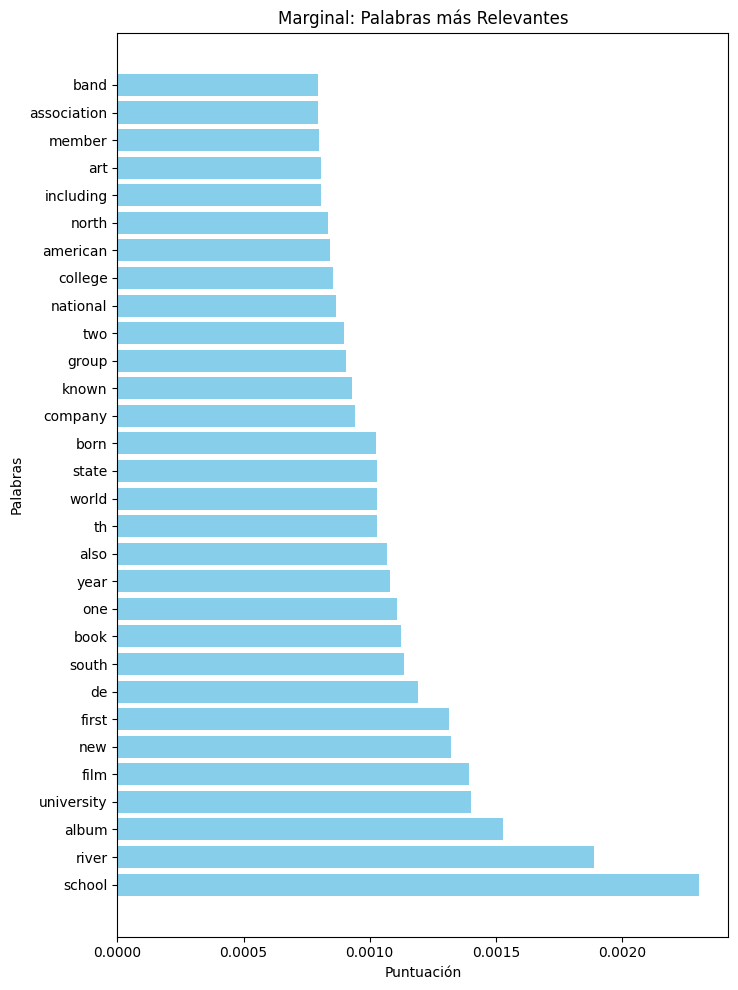

In [ ]:
# Preparar datos para graficar
methods = ["Marginal"]
top_words_list = [
    sorted(probabilidades_marginales.items(), key=lambda x: x[1], reverse=True)[:30]
]

# Crear gráficas
plt.figure(figsize=(20, 10))

for i, method in enumerate(methods):
    words, scores = zip(*top_words_list[i])
    plt.subplot(1, 3, i + 1)
    plt.barh(words, scores, color='skyblue')
    plt.title(f"{method}: Palabras más Relevantes")
    plt.xlabel("Puntuación")
    plt.ylabel("Palabras")

plt.tight_layout()
plt.show()

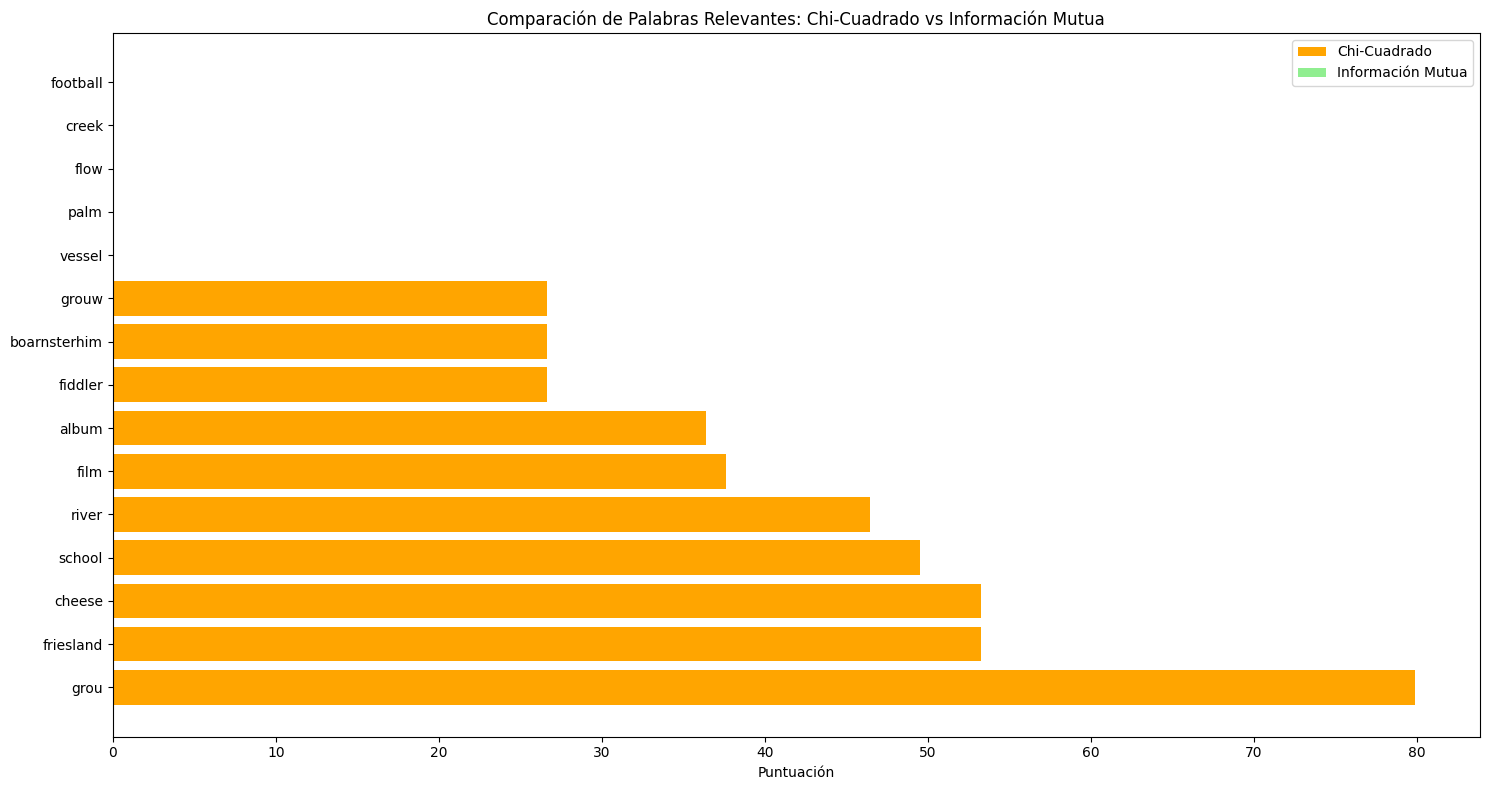

In [ ]:
import matplotlib.pyplot as plt

def graficar_palabras_relevantes(palabras_chi, palabras_mi):
    # Filtrar palabras con puntajes mayores a 0
    palabras_chi_filtradas = [(palabra, puntaje) for palabra, puntaje in palabras_chi if puntaje > 0]
    palabras_mi_filtradas = [(palabra, puntaje) for palabra, puntaje in palabras_mi if puntaje > 0]

    # Ordenar palabras por puntaje
    palabras_chi_filtradas.sort(key=lambda x: x[1], reverse=True)
    palabras_mi_filtradas.sort(key=lambda x: x[1], reverse=True)

    # Crear gráfico de barras agrupadas
    fig, ax = plt.subplots(figsize=(15, 8))
    palabras = [palabra for palabra, _ in palabras_chi_filtradas + palabras_mi_filtradas]
    palabras_unicas = list(set(palabras))
    palabras_unicas.sort(key=lambda x: max(dict(palabras_chi_filtradas).get(x, 0), dict(palabras_mi_filtradas).get(x, 0)), reverse=True)

    chi_scores = [dict(palabras_chi_filtradas).get(palabra, 0) for palabra in palabras_unicas]
    mi_scores = [dict(palabras_mi_filtradas).get(palabra, 0) for palabra in palabras_unicas]

    x = range(len(palabras_unicas))
    ax.barh(x, chi_scores, color='orange', label='Chi-Cuadrado')
    ax.barh(x, mi_scores, left=chi_scores, color='lightgreen', label='Información Mutua')

    ax.set_yticks(x)
    ax.set_yticklabels(palabras_unicas)
    ax.set_xlabel('Puntuación')
    ax.set_title('Comparación de Palabras Relevantes: Chi-Cuadrado vs Información Mutua')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Graficar palabras relevantes
graficar_palabras_relevantes(palabras_chi, palabras_mi)

Preguntas:

**¿Qué diferencias encuentras entre las palabras seleccionadas por Chi-cuadrado e Información Mutua?**

Las palabras seleccionadas por Chi-cuadrado tienden a resaltar términos que están fuertemente asociados con categorías específicas, como "grou", "cheese" y "friesland", que probablemente sean características distintivas de ciertos grupos temáticos dentro del corpus. Por otro lado, las palabras seleccionadas por Información Mutua, como "river", "album" y "vessel", reflejan términos que comparten una relación informativa más general con las categorías, capturando tanto términos específicos como conceptos más amplios. Esto sugiere que Chi-cuadrado es más sensible a desviaciones estadísticas locales, mientras que Información Mutua prioriza relaciones más globales y menos dependientes de frecuencias extremas.

**¿Crees que el calculo de la probabilidad marginal pueda ser util para un sistema de clasificacion de categorias?¿por que?**

El cálculo de la probabilidad marginal puede ser útil en un sistema de clasificación de categorías, pero su utilidad está limitada a contextos donde las palabras más comunes en el corpus global sean relevantes para distinguir entre categorías. Por ejemplo, palabras como "school", "river" y "film", que tienen alta probabilidad marginal, son términos generales que podrían ser útiles para identificar temas amplios. Sin embargo, estas palabras carecen de especificidad para categorías más especializadas, lo que podría reducir su efectividad en sistemas que requieren discriminación fina entre clases. Por ello, la probabilidad marginal sería más adecuada como un complemento a otros métodos más precisos, como Chi-cuadrado o Información Mutua.

**¿Podríamos aplicar estos métodos en otro tipo de datos, como imágenes o señales de audio? ¿Cómo?**

Sí, estos métodos pueden adaptarse para trabajar con otros tipos de datos, como imágenes o señales de audio, siempre que se definan características apropiadas. Por ejemplo, en imágenes, las características podrían ser patrones de píxeles, texturas o bordes detectados mediante técnicas como el análisis de componentes principales. En señales de audio, las características podrían incluir coeficientes cepstrales en el dominio de la frecuencia o patrones temporales. Una vez extraídas estas características, los métodos de Chi-cuadrado e Información Mutua podrían utilizarse para seleccionar aquellas que mejor discriminen entre clases, similar a cómo se seleccionan palabras relevantes en texto. La clave radica en transformar los datos en un formato estructurado que permita calcular frecuencias y probabilidades.

**Si se agregaran más documentos al corpus, ¿cómo cambiarían los valores de TF-IDF y selección de características?**

Al agregar más documentos al corpus, los valores de TF-IDF y la selección de características podrían cambiar significativamente. Para TF-IDF, el componente IDF disminuiría para palabras que aparezcan en los nuevos documentos, especialmente si estas palabras eran previamente infrecuentes. Esto podría reducir la importancia relativa de términos raros pero relevantes. En cuanto a la selección de características, palabras que antes eran altamente discriminativas podrían perder relevancia si se vuelven más comunes en el corpus expandido. Por otro lado, nuevas palabras relevantes podrían emerger si los documentos adicionales introducen vocabulario específico de nuevas categorías.